<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting/blob/main/Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pytz
tz_NY = pytz.timezone('Asia/Kolkata')
datetime_NY = datetime.datetime.now(tz_NY)
print("Run date time (IST):", datetime_NY.strftime("%Y-%m-%d %H:%M:%S"))

gen_output = 0

Run date time (IST): 2024-02-04 22:34:45


In [2]:
# install libraries
!pip install yfinance
!pip install pandas-ta
#!pip install talib-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=cba305743322a62d6e6b5c7bc120772630b6b5120a0a11406d1fa98d6c9be414
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
# import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
#import talib
yfin.pdr_override()
import pandas_ta as ta

from google.colab import data_table

In [4]:
# set start and end date
start_date = (datetime.date.today() + datetime.timedelta(days=-10*365)).strftime('%Y-%m-%d')
start1_date = (datetime.date.today() + datetime.timedelta(days=-1*365)).strftime('%Y-%m-%d')
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

In [5]:
# fetch nse indices scrips

import pandas as pd
import numpy as np

df_nse_sectors = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting/main/data/NSE_Sectors_Indices.csv')

In [10]:
sectors = df_nse_sectors['Sector'].unique()
df_sectors = pd.DataFrame()
for sector in sectors:
  stocks = df_nse_sectors[df_nse_sectors['Sector'] == sector]['Symbol'].values
  df_sector = pd.DataFrame()
  tweight = 0
  for stock in stocks:
    stock_df = yfin.Ticker(stock+'.NS').history(period='5y', interval='1d')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
    col = ['Close']
    stock_df = stock_df[col]
    stock_df['Split'] = 1
    weight = df_nse_sectors[df_nse_sectors['Symbol'] == stock]['Weight'].values[0]
    tweight = sum(df_nse_sectors[df_nse_sectors['Sector'] == sector]['Weight'].values)
    if stock == 'NESTLEIND':
      stock_df.loc[stock_df.index < '2024-01-01', 'Split'] = 10
    #stock_df[stock] = (stock_df[col]*weight)/(tweight*stock_df['Split'].values[0])
    stock_df[stock] = stock_df['Close']/stock_df['Split']
    col = [stock]
    stock_df = stock_df[col]
    df_sector = pd.concat([df_sector, stock_df], axis=1)

  df_sector[sector] = df_sector[stocks].sum(axis=1)
  col = [sector]
  df_sector = df_sector[col]
  df_sectors = pd.concat([df_sectors, df_sector], axis=1)
df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT
Date,,,,,,,,,,,
2019-02-04 00:00:00+05:30,12528.917923,3621.829803,3254.790012,5481.081665,6235.490260,7491.992462,847.408512,808.923733,8111.453968,3735.260612,21534.472443
2019-02-05 00:00:00+05:30,12752.375305,3640.950134,3262.374058,5533.012054,6152.961473,7530.226837,861.343084,808.546917,8120.288078,3696.318428,21304.731110
2019-02-06 00:00:00+05:30,12912.574768,3652.444794,3388.686024,5655.340454,6185.840826,7582.296722,901.805511,826.993095,8206.545872,3704.048416,21721.087708
2019-02-07 00:00:00+05:30,13170.952423,3657.043976,3383.334557,5683.021088,6235.339360,7647.156189,913.758015,821.777828,8223.919960,3755.223717,22078.480652
2019-02-08 00:00:00+05:30,12946.641281,3658.932190,3381.788750,5634.629242,6067.225552,7596.690735,892.739445,796.890175,8121.633129,3715.076256,21967.371719
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29 00:00:00+05:30,26579.400146,5978.150085,10196.899872,14267.850098,12940.249939,17234.050171,3389.300026,5577.799927,26926.299927,19192.000366,44009.050415
2024-01-30 00:00:00+05:30,26543.200317,5965.650024,9759.050217,14154.449829,12854.599915,17178.850098,3337.000046,5619.500107,26417.649475,18958.150360,43385.399536
2024-01-31 00:00:00+05:30,27013.100037,6024.200073,9855.899933,14313.199799,13025.899963,17748.050049,3355.899956,5706.950027,26597.399765,19224.249802,44107.999695


In [11]:
def stock_prec_dev(stock_symbol):
    #stock_symbol = 'ULTRACEMCO.NS'
    short_window = 20
    mid_window = 50
    long_window = 200
    moving_avg = 'SMA'

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-')))

    stock_df = df_sectors[[stock_symbol]]
    stock_df.columns = ['Close']

    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start_date)]
    stock_df['200_SMA'] = round(stock_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
    stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_SMA'])*100/stock_df['200_SMA'],2)
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows

    stock_df['Sector'] = stock_symbol

    stock_df['Close'] = round(stock_df['Close'],2)
    stock_df['Max'] = round(max(stock_df['Close']),2)
    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start1_date)]
    stock_df['Min'] = round(min(stock_df['Close']),2)
    #stock_df['Gained%'] = round((stock_df['Close'] - stock_df['Min'])*100/stock_df['Min'],2)
    stock_df.ta.rsi(append=True)
    #stock_df.rename(columns={'RSI_14':'RSI'}, inplace=True)
    #stock_df['Close'] = round(stock_df['Close'],0)
    stock_df['RSI_14'] = round(stock_df['RSI_14'],0)
    stock_df['ATH%'] = round((stock_df['Max'] - stock_df['Close'])*100/stock_df['Close'],2)
    #stock_df['Sector'] = stock_symbol
    stock_df = stock_df.tail(1)
    return stock_df

In [12]:
df_final =  pd.DataFrame()
for sector in sectors:

  df_tmp = stock_prec_dev(sector)
  df_final = df_final.append(df_tmp)
# all sectors
df_final = df_final.sort_values(by = 'ATH%', ascending=False)
data_table.DataTable(df_final, include_index=False)

,Close,200_SMA,Dev%_200,Sector,Max,Min,RSI_14,ATH%
Date,,,,,,,,
2024-02-02 00:00:00+05:30,3295.00,3129.0,5.31,MEDIA,3808.40,1273.44,49.0,15.58
2024-02-02 00:00:00+05:30,14550.50,12822.0,13.48,IT,16403.73,10640.54,53.0,12.74
2024-02-02 00:00:00+05:30,5751.75,4734.0,21.50,METAL,6262.29,3173.78,66.0,8.88
2024-02-02 00:00:00+05:30,9870.25,9474.0,4.18,FINANCE,10627.62,6955.03,44.0,7.67
2024-02-02 00:00:00+05:30,6009.80,5970.0,0.67,BANKS,6391.75,5339.05,44.0,6.36
2024-02-02 00:00:00+05:30,18901.35,17580.0,7.52,CHEMICAL,19993.05,14515.64,49.0,5.78
2024-02-02 00:00:00+05:30,12971.45,11904.0,8.97,FMCG,13527.44,10048.88,50.0,4.29
2024-02-02 00:00:00+05:30,43868.45,38537.0,13.83,CEMENT,44911.30,12532.59,53.0,2.38
2024-02-02 00:00:00+05:30,26542.35,21713.0,22.24,INFRA,26926.30,17857.30,63.0,1.45


In [13]:
df_final

,Close,200_SMA,Dev%_200,Sector,Max,Min,RSI_14,ATH%
Date,,,,,,,,
2024-02-02 00:00:00+05:30,3295.00,3129.0,5.31,MEDIA,3808.40,1273.44,49.0,15.58
2024-02-02 00:00:00+05:30,14550.50,12822.0,13.48,IT,16403.73,10640.54,53.0,12.74
2024-02-02 00:00:00+05:30,5751.75,4734.0,21.50,METAL,6262.29,3173.78,66.0,8.88
2024-02-02 00:00:00+05:30,9870.25,9474.0,4.18,FINANCE,10627.62,6955.03,44.0,7.67
2024-02-02 00:00:00+05:30,6009.80,5970.0,0.67,BANKS,6391.75,5339.05,44.0,6.36
2024-02-02 00:00:00+05:30,18901.35,17580.0,7.52,CHEMICAL,19993.05,14515.64,49.0,5.78
2024-02-02 00:00:00+05:30,12971.45,11904.0,8.97,FMCG,13527.44,10048.88,50.0,4.29
2024-02-02 00:00:00+05:30,43868.45,38537.0,13.83,CEMENT,44911.30,12532.59,53.0,2.38
2024-02-02 00:00:00+05:30,26542.35,21713.0,22.24,INFRA,26926.30,17857.30,63.0,1.45


In [28]:
col = ['BANKS']
sector_df = df_sectors[col]
sector_df.columns = ['Close']
sector_df['200_SMA'] = round(sector_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
sector_df['50_SMA'] = round(sector_df['Close'].rolling(window = 50, min_periods = 1).mean(),0)
sector_df['20_SMA'] = round(sector_df['Close'].rolling(window = 20, min_periods = 1).mean(),0)
sector_df

,Close,200_SMA,50_SMA,20_SMA
Date,,,,
2019-02-04 00:00:00+05:30,3621.829803,3622.0,3622.0,3622.0
2019-02-05 00:00:00+05:30,3640.950134,3631.0,3631.0,3631.0
2019-02-06 00:00:00+05:30,3652.444794,3638.0,3638.0,3638.0
2019-02-07 00:00:00+05:30,3657.043976,3643.0,3643.0,3643.0
2019-02-08 00:00:00+05:30,3658.932190,3646.0,3646.0,3646.0
...,...,...,...,...
2024-01-29 00:00:00+05:30,5978.150085,5965.0,6112.0,6139.0
2024-01-30 00:00:00+05:30,5965.650024,5966.0,6115.0,6120.0
2024-01-31 00:00:00+05:30,6024.200073,5968.0,6120.0,6108.0


<Axes: xlabel='Date'>

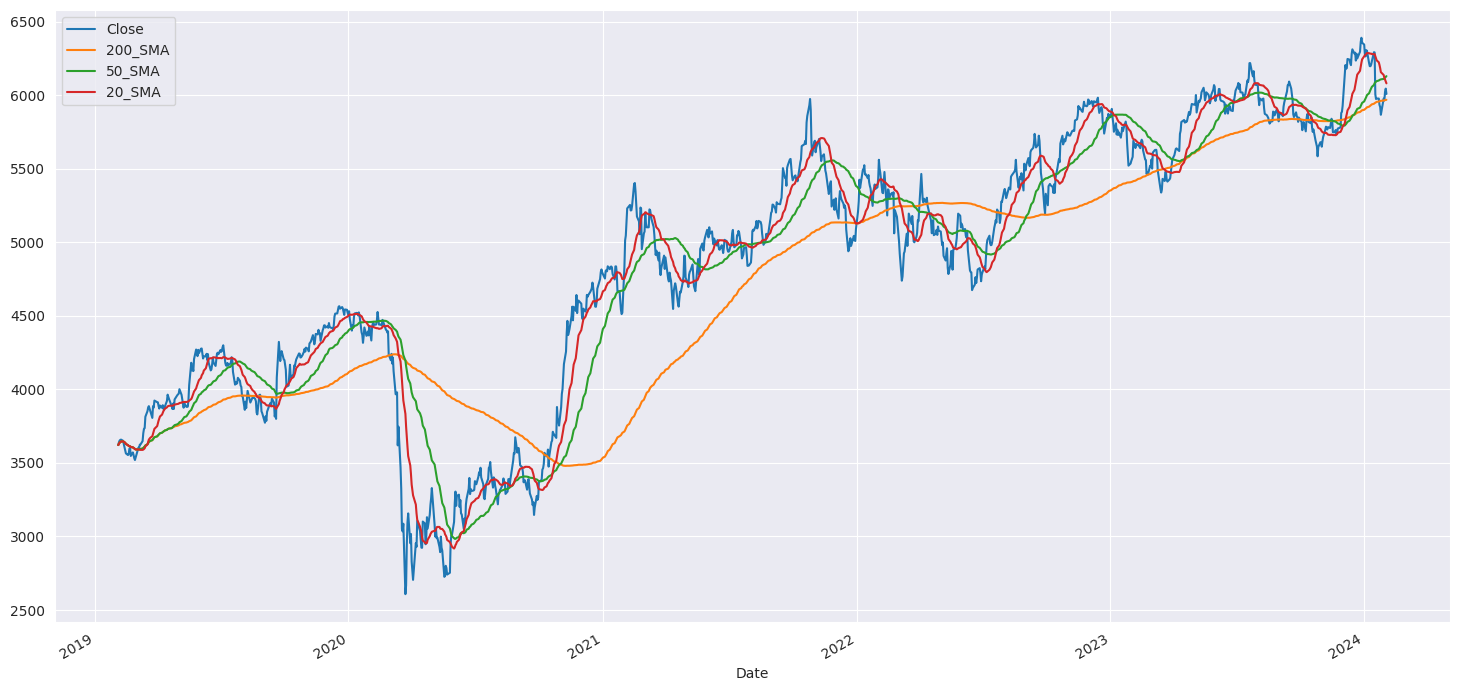

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = sector_df.reset_index()
tmp_df.plot(x='Date', y=['Close','200_SMA','50_SMA','20_SMA'], figsize=(18,9))